In [2]:
import pandas as pd
import prophet
import matplotlib.pyplot as plt

# Prophet de Meta

## ¿Qué es Prophet? El Enfoque Aditivo

Prophet es una librería de código abierto desarrollada por el equipo de Ciencia de Datos de Meta (anteriormente Facebook). Está diseñada para realizar **predicciones de series de tiempo** de alta calidad, especialmente aquellas que presentan fuertes efectos estacionales y días festivos.

Su principal fortaleza radica en que es **fácil de usar**, robusto ante datos faltantes o *outliers*, y lo más importante: se basa en un **modelo aditivo** que es altamente interpretable.

El modelo subyacente de Prophet sigue una estructura modular, donde la predicción $\hat{y}(t)$ en un momento dado $t$ se compone de tres elementos principales.




## 💡 El Corazón de Prophet: La Intuición del Modelo Aditivo

Prophet no es un modelo complejo de "caja negra"; es como un **rompecabezas modular**. En lugar de predecir todo de una vez, descompone la serie de tiempo en **tres partes simples** y fáciles de entender, y luego las suma.

Imagina que tu serie de tiempo son tus **ventas diarias**. Prophet dice: "Tu venta total en el tiempo ($\hat{y}(t)$) es la suma de:"

$$\hat{y}(t) = g(t) + s(t) + h(t) + \epsilon_t$$

$$\hat{y}(t) = \text{Tendencia} + \text{Estacionalidad} + \text{Días Festivos} + \text{Error}$$

La clave de Prophet es esta **estructura modular**. Al modelar cada componente ($\mathbf{g(t)}$, $\mathbf{s(t)}$, $\mathbf{h(t)}$) por separado, podemos entender **exactamente por qué** la predicción sube o baja en cualquier momento.





## 📈 Componente 1: La Tendencia ($g(t)$)

La **Tendencia ($g(t)$)** captura el **crecimiento o decrecimiento a largo plazo**. Piensa en la popularidad general de tu producto o en el estado de la economía.

### ¿Cómo lo modela Prophet?

Prophet utiliza una línea recta **a trozos** (*piecewise*). Es decir, la tasa de crecimiento puede **cambiar abruptamente** en momentos específicos, llamados **Puntos de Cambio** (*Changepoints*).

  * **Intuición:** El modelo se adapta a eventos históricos que alteraron el crecimiento, como un cambio de política o el lanzamiento de un competidor. Prophet detecta estos cambios automáticamente.
  * **Modelo Logístico (Opcional):** Si sabemos que el crecimiento tiene un **límite máximo conocido** (por ejemplo, la capacidad de un mercado), Prophet puede usar una curva que se **aplana** a medida que se acerca a ese límite, en lugar de crecer sin parar.

**En resumen:** La Tendencia es la **dirección principal** de la serie, y Prophet la hace flexible para ajustarse a la realidad histórica.





## ☀️ Componente 2: La Estacionalidad ($s(t)$)

La **Estacionalidad ($s(t)$)** modela los **patrones regulares que se repiten** a lo largo del tiempo.

  * **Ejemplos:** Las ventas suben todos los lunes (patrón semanal) o las ventas de un producto suben siempre en diciembre (patrón anual).

### ¿Cómo lo modela Prophet?

Prophet usa **Series de Fourier** (una combinación de funciones de seno y coseno).

  * **Intuición:** Esto es como un **ecualizador de sonido**. Al mezclar ondas suaves de diferentes frecuencias, Prophet puede recrear la **forma exacta** de tu patrón repetitivo (semanal o anual), incluso si es complejo, sin tener que asumir una forma rígida.
  * **Parámetros:** Tú solo le dices a Prophet qué períodos debe buscar: `weekly_seasonality=True`, `yearly_seasonality=True`.

**En resumen:** La Estacionalidad captura el **ritmo y los ciclos** de la serie de tiempo.





## 🗓️ Componente 3: Días Festivos y Eventos ($h(t)$)

El componente **Días Festivos ($h(t)$)** es un **ajuste manual** para capturar el impacto conocido de eventos **irregulares**, que no son parte del ciclo normal semanal o anual.

  * **Ejemplo:** Black Friday, un evento deportivo único, o un día de huelga.
  * **Funcionamiento:** Se trata de una variable *dummy* (un indicador binario 0/1). Si la fecha $t$ coincide con un día festivo, el modelo aplica un **efecto adicional** (positivo o negativo) a la predicción.
  * **Parámetros:** Le proporcionamos a Prophet una lista simple de fechas.

**En resumen:** Los Días Festivos **corrigen** la predicción para eventos puntuales y especiales, mejorando la precisión en fechas clave.


<>:42: SyntaxWarning: invalid escape sequence '\h'
<>:43: SyntaxWarning: invalid escape sequence '\h'
<>:42: SyntaxWarning: invalid escape sequence '\h'
<>:43: SyntaxWarning: invalid escape sequence '\h'
C:\Users\kenny\AppData\Local\Temp\ipykernel_1644\1967583066.py:42: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(dias, y_hat, label='Predicción $\hat{y}(t) = g(t) + s(t)$', color='green', linewidth=2)
C:\Users\kenny\AppData\Local\Temp\ipykernel_1644\1967583066.py:43: SyntaxWarning: invalid escape sequence '\h'
  plt.title('Resultado: El Modelo Aditivo Final ($\hat{y}(t)$)')


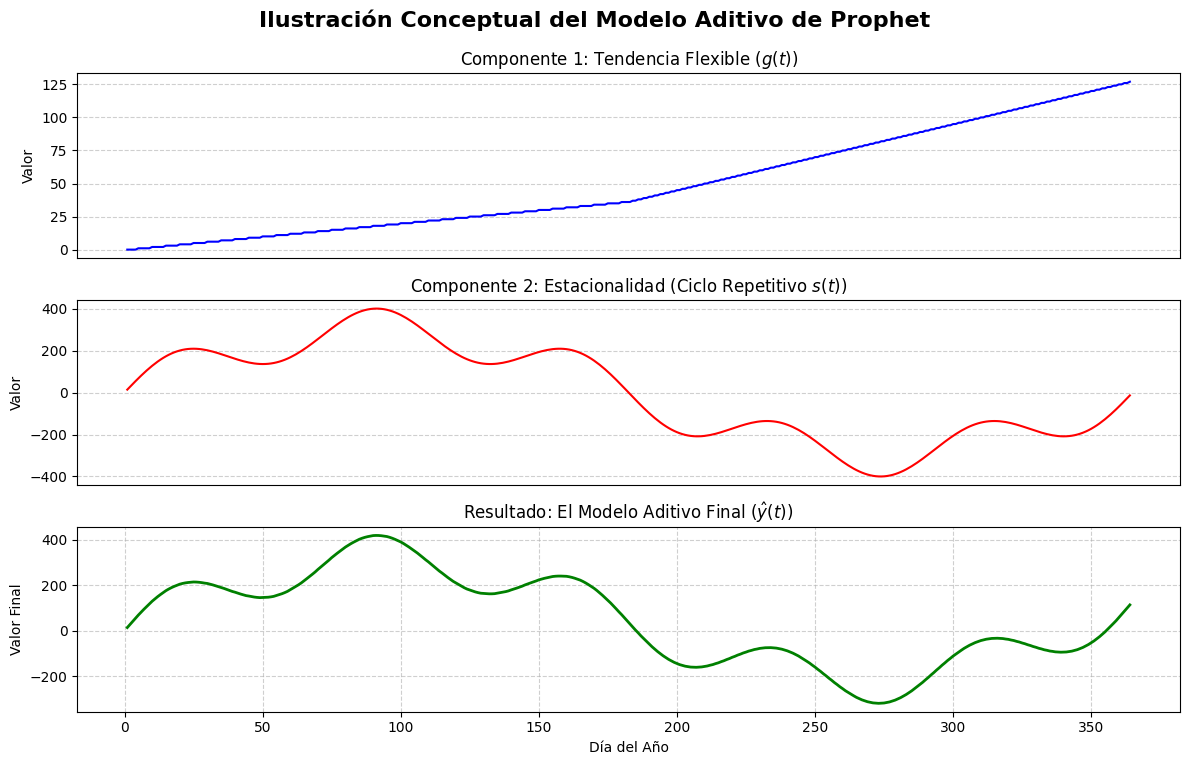

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Crear el eje de tiempo (52 semanas o 1 año conceptual)
dias = np.arange(1, 365)
tiempo = dias / 365 # Normalizado para fines de la gráfica

# 2. Componente g(t): Tendencia (Un crecimiento lineal con un "punto de cambio" a mitad de año)
# Simulamos una tendencia que aumenta su inclinación a mitad de año
g_t = np.piecewise(dias, [dias < 182, dias >= 182], 
                   [lambda x: 0.2 * x, lambda x: 0.2 * 182 + 0.5 * (x - 182)])

# 3. Componente s(t): Estacionalidad (Un patrón anual de ondas)
s_t = 300 * np.sin(2 * np.pi * tiempo * 1) + 100 * np.sin(2 * np.pi * tiempo * 5)

# 4. Predicción (y_hat): La suma de los componentes
y_hat = g_t + s_t

# 5. Generar la Gráfica de Descomposición

plt.figure(figsize=(12, 8))

# Gráfica 1: Tendencia (g(t))
plt.subplot(3, 1, 1)
plt.plot(dias, g_t, label='Tendencia $g(t)$', color='blue')
plt.title('Componente 1: Tendencia Flexible ($g(t)$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylabel('Valor')
plt.xticks([]) # Ocultar etiquetas X para mantener la limpieza

# Gráfica 2: Estacionalidad (s(t))
plt.subplot(3, 1, 2)
plt.plot(dias, s_t, label='Estacionalidad $s(t)$', color='red')
plt.title('Componente 2: Estacionalidad (Ciclo Repetitivo $s(t)$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylabel('Valor')
plt.xticks([]) # Ocultar etiquetas X para mantener la limpieza

# Gráfica 3: Predicción (g(t) + s(t))
plt.subplot(3, 1, 3)
plt.plot(dias, y_hat, label='Predicción $\hat{y}(t) = g(t) + s(t)$', color='green', linewidth=2)
plt.title('Resultado: El Modelo Aditivo Final ($\hat{y}(t)$)')
plt.xlabel('Día del Año')
plt.ylabel('Valor Final')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Ilustración Conceptual del Modelo Aditivo de Prophet', fontsize=16, fontweight='bold')
plt.show()


> 1.  Crea una **Tendencia ($g(t)$)** (arriba) que maneja el crecimiento a largo plazo y se ajusta a cambios importantes (*puntos de cambio*).
> 2.  Añade una **Estacionalidad ($s(t)$)** (en medio) que captura los ciclos repetitivos (como el invierno o el verano) usando ondas suaves de Fourier.
> 3.  Al **sumar** estos dos componentes (junto con el efecto de días festivos que no se muestra), obtenemos la **Predicción Final ($\hat{y}(t)$)** (abajo), la cual es mucho más rica y precisa que si solo usáramos una línea recta."

